# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("customer_churn.csv")
df                                                #Importing the Dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df=pd.DataFrame(data=df)
df                                #giving structural format to dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA (Exploratory Data Analysis):

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4751,8785-EPNCG,Male,0,No,No,11,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),23.15,245.2,Yes


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.columns        # Displaying all the column names 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.info()

#displaying the data types and null values of all the columns
#most of the columns are in object data type form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()             #we can see that there are no null values in our dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

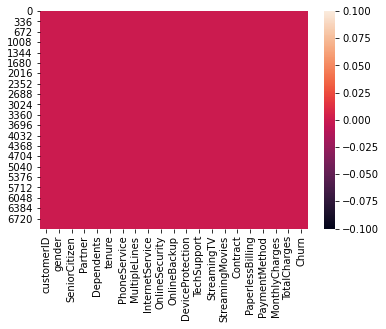

In [12]:
sns.heatmap(df.isnull())         #no null values are present in dataset

<AxesSubplot:xlabel='gender', ylabel='count'>

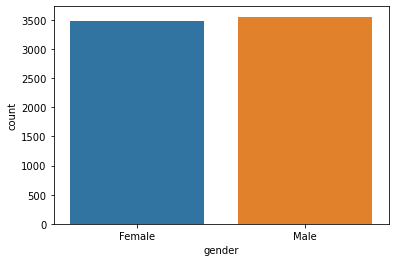

In [13]:
sns.countplot(df['gender'])                     #we can see that both male and female are equal customers present

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

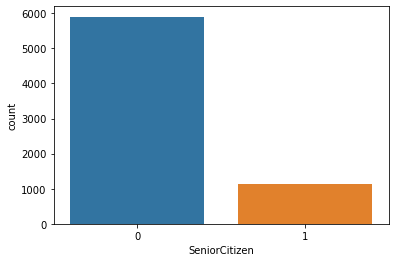

In [14]:
sns.countplot(df["SeniorCitizen"])

#Senior Citizens customers are very less in our dataset

<AxesSubplot:xlabel='Partner', ylabel='count'>

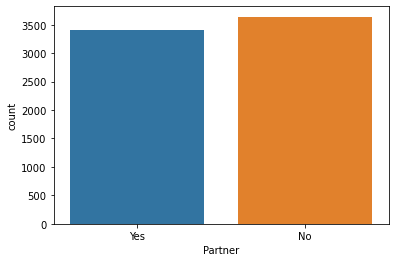

In [15]:
sns.countplot(df["Partner"])
#we can see that the customers with partner and without partner are almost equal in number 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

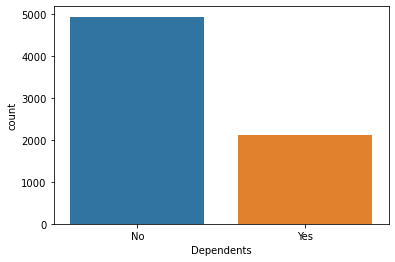

In [16]:
sns.countplot(df['Dependents'])
#people with dependents are half of the people without dependents

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

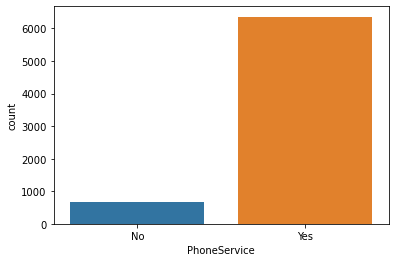

In [17]:
sns.countplot(df['PhoneService'])
#very few customers have no phone service and the number is about 500

<AxesSubplot:xlabel='InternetService', ylabel='count'>

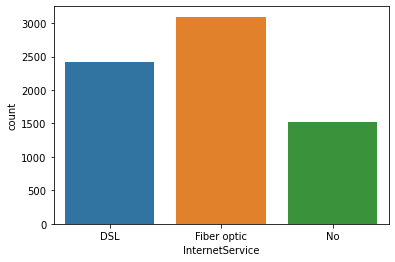

In [18]:
sns.countplot(df['InternetService'])
#more customers are using Fiber optic internet service, and few customers dont take internet service

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

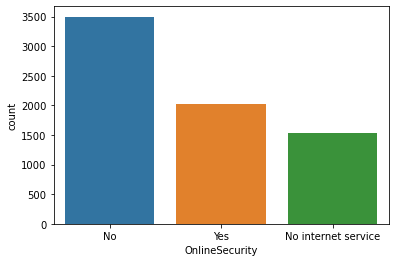

In [19]:
sns.countplot(df['OnlineSecurity'])
#most of the people dont opt for online security

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

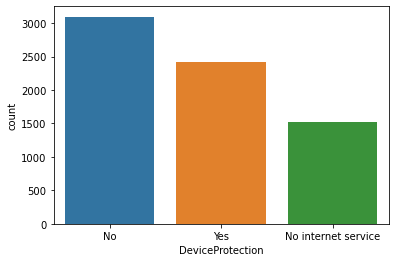

In [20]:
sns.countplot(df['DeviceProtection'])
#more customers dont take device protection

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

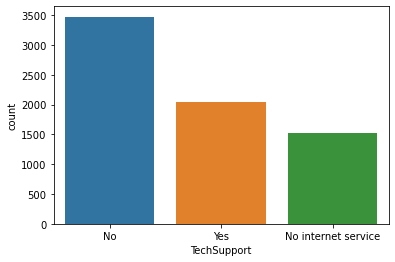

In [21]:
sns.countplot(df['TechSupport'])
#very few customers who have opted for internet services have also opted for tech support services

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

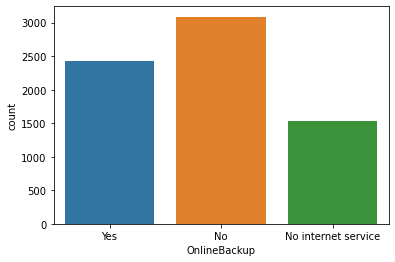

In [22]:
sns.countplot(df["OnlineBackup"])

#few customers who have opted for internet services have also opted for online backup services

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

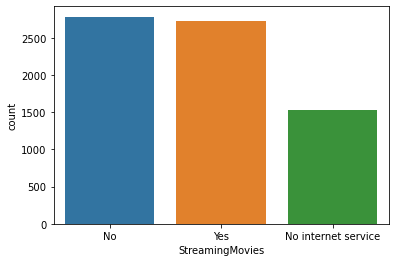

In [23]:
sns.countplot(df["StreamingMovies"])

#mostly equal number of customers are there who have and who have not opted for Movie Stream Services

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

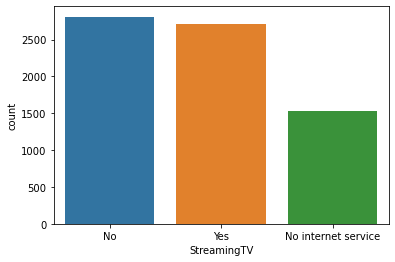

In [24]:
sns.countplot(df["StreamingTV"])

#mostly equal number of customers are there who have and who have not opted for TV Stream Services

<AxesSubplot:xlabel='Contract', ylabel='count'>

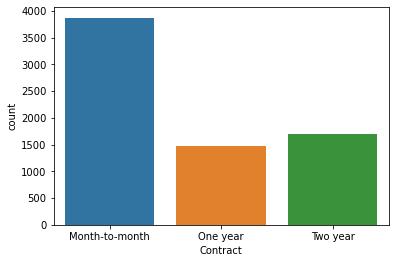

In [25]:
sns.countplot(df["Contract"])
#most customers prefer Month to Month payment contracts While few cutomers prefer for long term payment contracts of 1 and 2 years

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

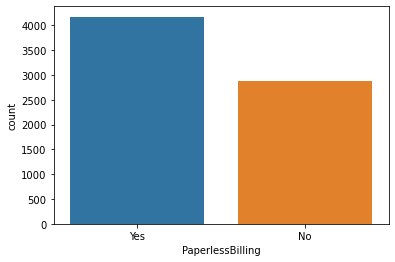

In [26]:
sns.countplot(df["PaperlessBilling"])
#most customers have opted for paperless billing system

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

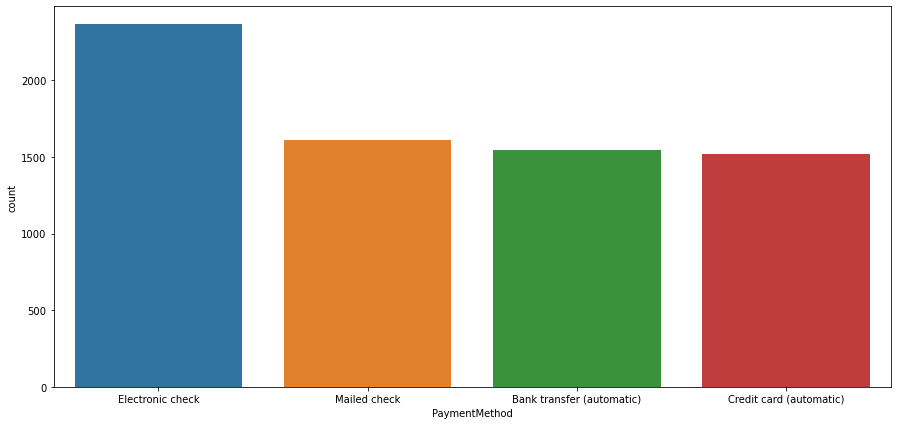

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(df["PaymentMethod"])
#most customers prefer to keep their payment mode as Electronic Check

<AxesSubplot:xlabel='Churn', ylabel='count'>

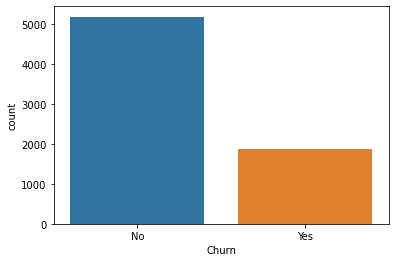

In [28]:
sns.countplot(df["Churn"])
#around 40% of customers leave the company services and therefore shows the high churn rate

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

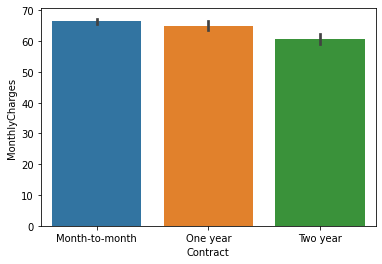

In [29]:
sns.barplot(x=df["Contract"], y=df["MonthlyCharges"])
#month-to-month contract is expensive than one year contract and Two year contract is little cheaper than other 2

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

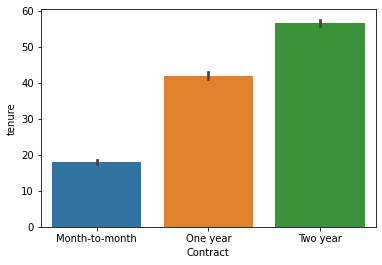

In [30]:
sns.barplot(x=df["Contract"], y=df["tenure"])
#It shows for how much tenure the customers do which kind of contract with the company

<AxesSubplot:xlabel='Contract', ylabel='count'>

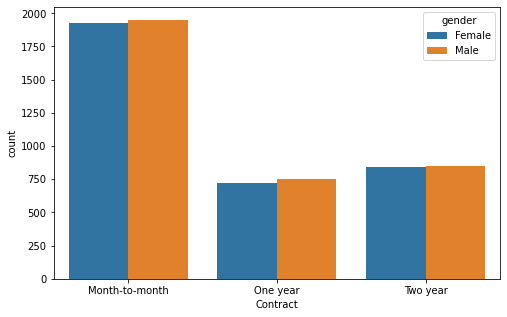

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(df["Contract"], hue=df["gender"])
#there are almost equal number of male and female customers doing same kind of contracts with the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

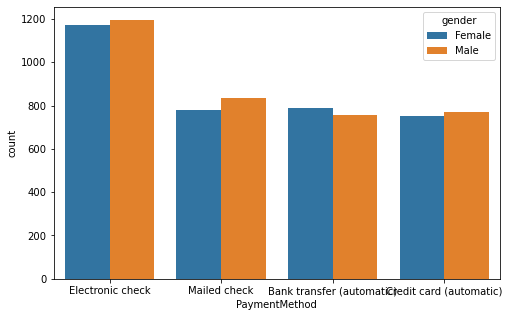

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(df["PaymentMethod"], hue=df["gender"])
#there are almost equal number of male and female customers using same kind of payment methods

# Data Cleaning:

In [33]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [34]:
df.drop(columns=["customerID"],inplace=True)
#Dropping the Customer ID as it is not relevent for the Model Training

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Label Encoding:

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in dataset

In [38]:
df.head()            #we can see that all the object or categorical data is converted into numerical

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [39]:
df.dtypes               #from object, all the data is converted into integer

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

# Correlation:

In [40]:
df_corr=df.corr()
df_corr
#Checking the Correlation of independent variable with target variable

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

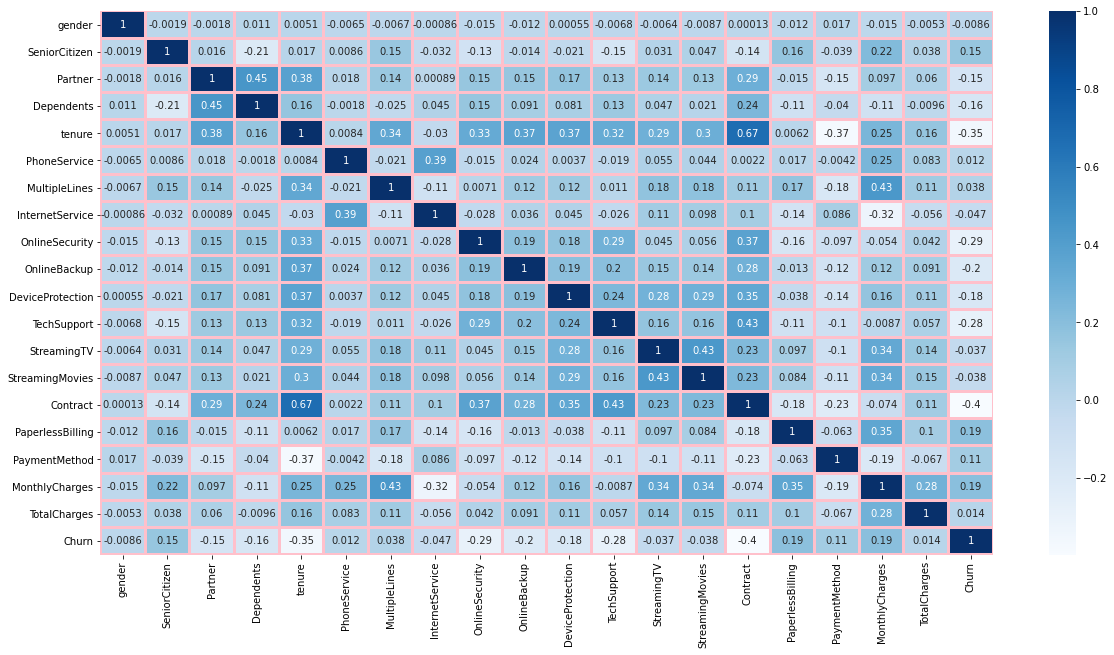

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True, linecolor="pink", linewidths=2, cmap="Blues")

we can see that few columns are negatively correlated to the target column.

# Describing dataset

In [42]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


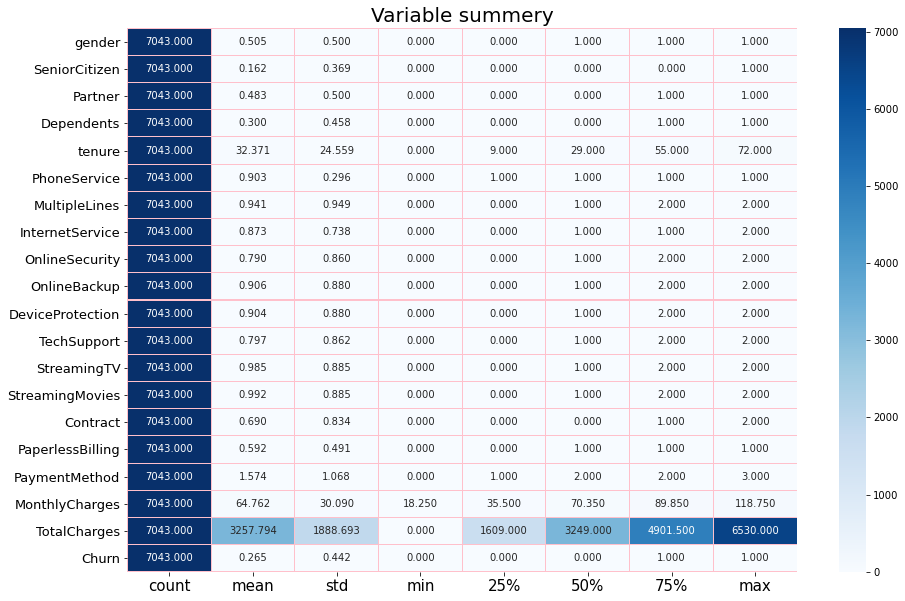

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe().transpose(),annot=True,fmt='.3f',linewidth=0.1,cmap='Blues',linecolor='pink')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title('Variable summery', fontsize=20)
plt.show()

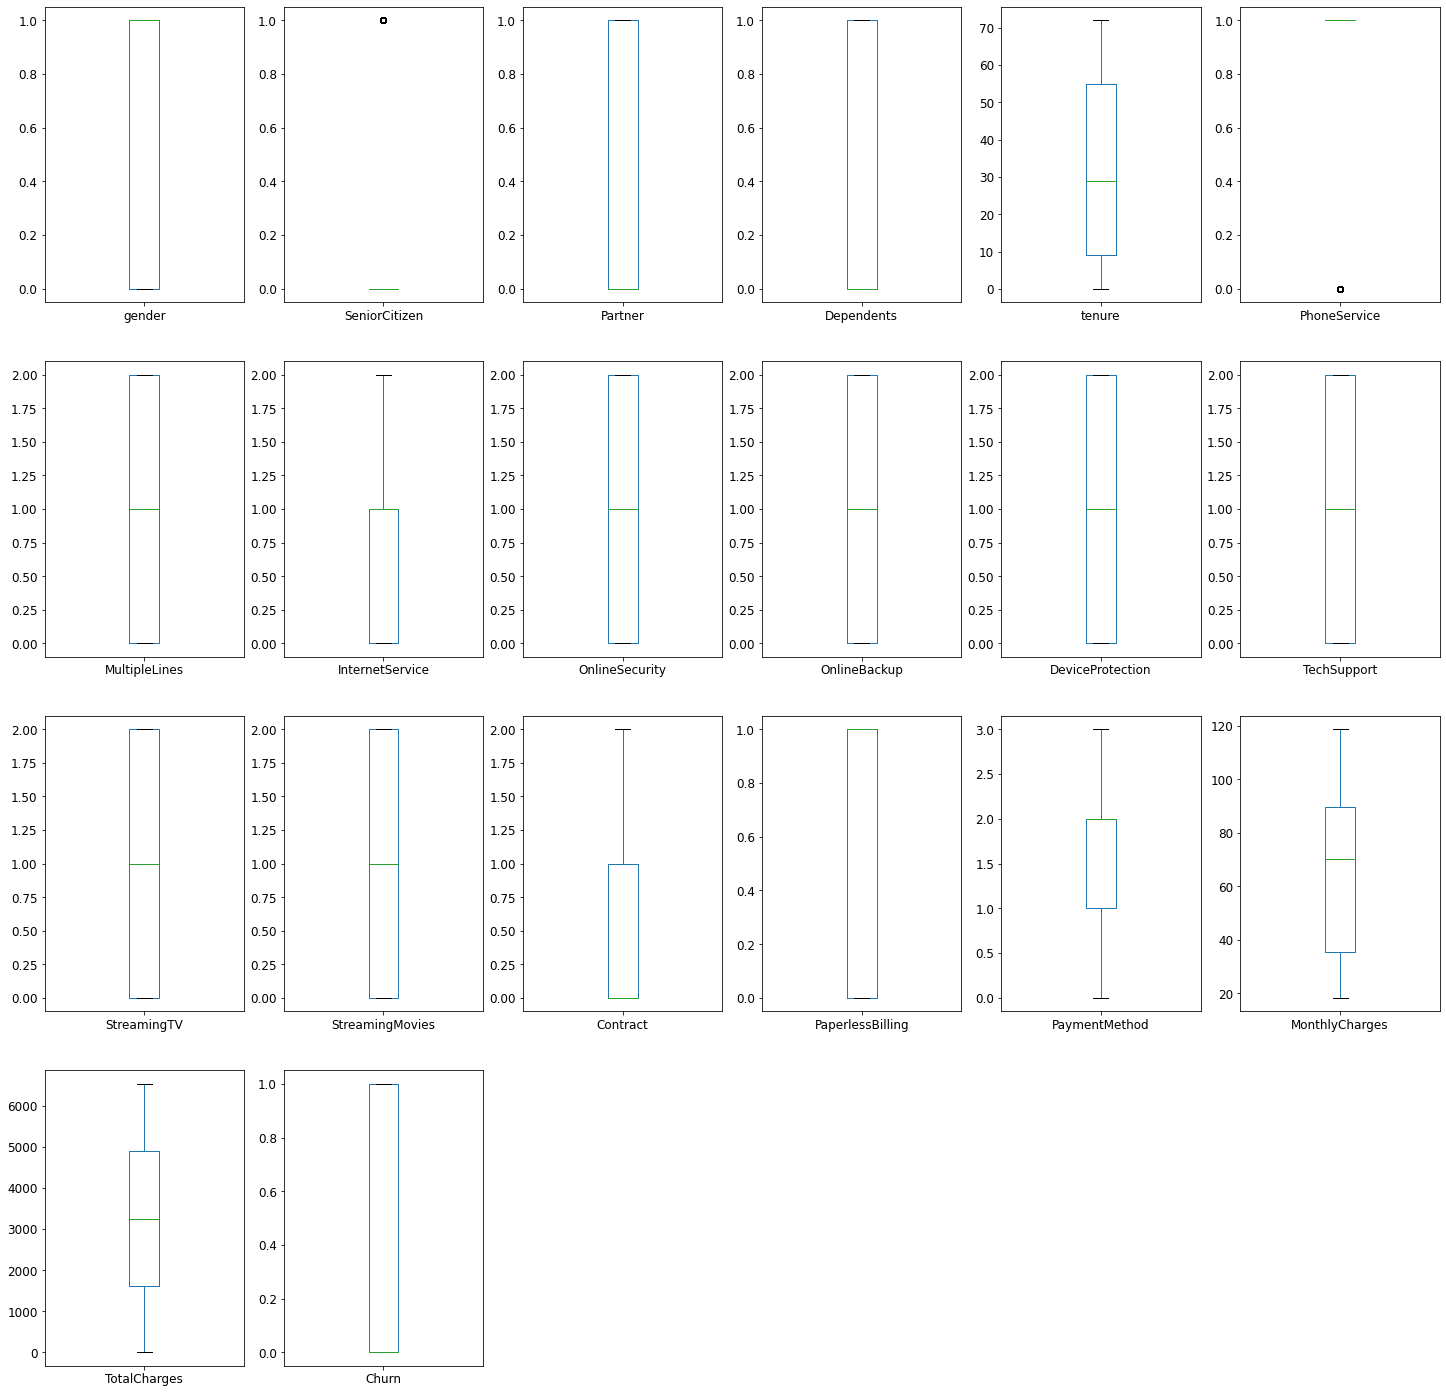

In [44]:
# The Subplot shows boxplots of all the variable at once without passing boxplot function individually for each variable

df.plot(kind='box',subplots=True, layout=(4,6),figsize=(25,25),fontsize=12)
plt.show()

#we can not see any outlier because the data was object type and only in 2 or 3 types in every column 
#so we will not consider any outlier treatment in our data cleaning

# splitting the independent and target variable in x and y

In [45]:
x=df.iloc[:,0:-1]
x                            #Taking all the Independent variables in x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [46]:
y=df.iloc[:,-1]
y                        #Taking the target variable in y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Splitting the data into train and test

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Finding best random state with high accuracy

In [48]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

# Finding the best accuracy with best random state

Best Accuracy is  0.8205565019875071 on Random State  240


# We found our best random state 240. we will split our data using this random state

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=240)

In [50]:
x_train.shape

(5282, 19)

In [51]:
x_test.shape

(1761, 19)

In [52]:
y_train.shape

(5282,)

In [53]:
y_test.shape

(1761,)

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 82.05565019875071
[[1189  113]
 [ 203  256]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1302
           1       0.69      0.56      0.62       459

    accuracy                           0.82      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761



# Model Building using other Classifiers:-

# Decision Tree classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy", accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy 73.25383304940375
[[1071  231]
 [ 240  219]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1302
           1       0.49      0.48      0.48       459

    accuracy                           0.73      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.73      0.73      0.73      1761



# Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 80.91993185689948
[[1204   98]
 [ 238  221]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1302
           1       0.69      0.48      0.57       459

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.80      0.81      0.80      1761



# Adaboost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print("Accuracy", accuracy_score(y_test,predada)*100)
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy 82.33957978421351
[[1197  105]
 [ 206  253]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1302
           1       0.71      0.55      0.62       459

    accuracy                           0.82      1761
   macro avg       0.78      0.74      0.75      1761
weighted avg       0.81      0.82      0.82      1761



# K Neighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy", accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

Accuracy 75.75241340147643
[[1152  150]
 [ 277  182]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1302
           1       0.55      0.40      0.46       459

    accuracy                           0.76      1761
   macro avg       0.68      0.64      0.65      1761
weighted avg       0.74      0.76      0.74      1761



# Support Vector Classifier

In [59]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 73.93526405451448
[[1302    0]
 [ 459    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1302
           1       0.00      0.00      0.00       459

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.43      1761
weighted avg       0.55      0.74      0.63      1761



# CROSS VALIDATION:

In [60]:
from sklearn.model_selection import cross_val_score
# Importing the Cross Validation Score

In [61]:
scr1=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model is: ", scr1.mean())

scr2=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of Decision Tree classifier model is: ", scr2.mean())

scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of RandomForest Classifier model is: ", scr3.mean())

scr4=cross_val_score(ada,x,y,cv=5)
print("Cross validation score of AdaBoost Classifier model is: ", scr4.mean())

scr5=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of KNeighbors Classifier model is: ", scr5.mean())

scr6=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of Support Vector Classifier model is: ", scr6.mean())

Cross validation score of Logistic Regression model is:  0.7998025074198335
Cross validation score of Decision Tree classifier model is:  0.7251169430285824
Cross validation score of RandomForest Classifier model is:  0.7897206069746436
Cross validation score of AdaBoost Classifier model is:  0.802499253984128
Cross validation score of KNeighbors Classifier model is:  0.7472663558939286
Cross validation score of Support Vector Classifier model is:  0.7346301575908123


# AdaBoostClassifier is giving us high accuracy of 82.3% and high cross validation score of 80.3% And difference between accuracy and cross validation score is optimum. So, we will consider AdaBoost Classifier model for Hyperparameter Tunnning

# Hyper Parameter Tuning:

In [62]:
from sklearn.model_selection import GridSearchCV  #Importing Grid Search CV to perform Hyper Parameter Tuning

In [63]:
parameter={"n_estimators":np.arange(2,10), 
           "algorithm":["SAMME","SAMME.R"],
          "learning_rate":np.arange(2,100),
          "random_state":np.arange(2,10)}

# Taking all the parameters to find the best Accuracy Score 

In [64]:
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [65]:
GCV.fit(x_train,y_train)         # Training the GridSearchCV model

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [66]:
GCV.best_params_            #checking the best parameters got from GridSearchCV

{'algorithm': 'SAMME',
 'learning_rate': 2,
 'n_estimators': 3,
 'random_state': 2}

In [70]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting with best parameters

accuracy_score(y_test,GCV_pred)              #checking final accuracy

0.7393526405451448

# Final Accuracy is 74%

# ROC AUC curve

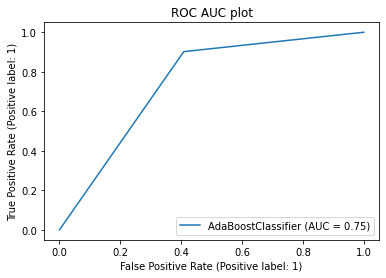

In [71]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Auc score is 75% and final accuracy is 74%

# Saving the model in pickle format

In [72]:
import joblib
joblib.dump(GCV.best_estimator_,"Customer_churn_final.pkl")

['Customer_churn_final.pkl']